# Using Neural Networks to Classify Stellar Objects by Redshift
# By Tabris Loveless

Steller Classification data from the Sloan Digital Sky Survery DR17, on Kaggle.com.

Fedesoriano. (2022, January 15). Stellar classification dataset - SDSS17. Kaggle. Retrieved November 30, 2022, from https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17 

# Data Processing
The first task is to examine the Steller Classification data. Below is the Excel csv file given by the Stellar Classification dataset.

The Steller Classification dataset contains 100,000 entries, with 17 variables and 1 classificaiton. Most of the provided variables are idenftification values, which are not important for neural network processing. This leaves 6 main variables, filter intensity, u (Ultra Violet), g (Green), r (Red), i (Near Infrared), z (Infrared), and a calculated redshift. The classifiers are GALAXY, QSO (Quasar), and STAR.  

The code below converts txt and csv files into 1D and 2D lists, which are then converted into numpy arrays

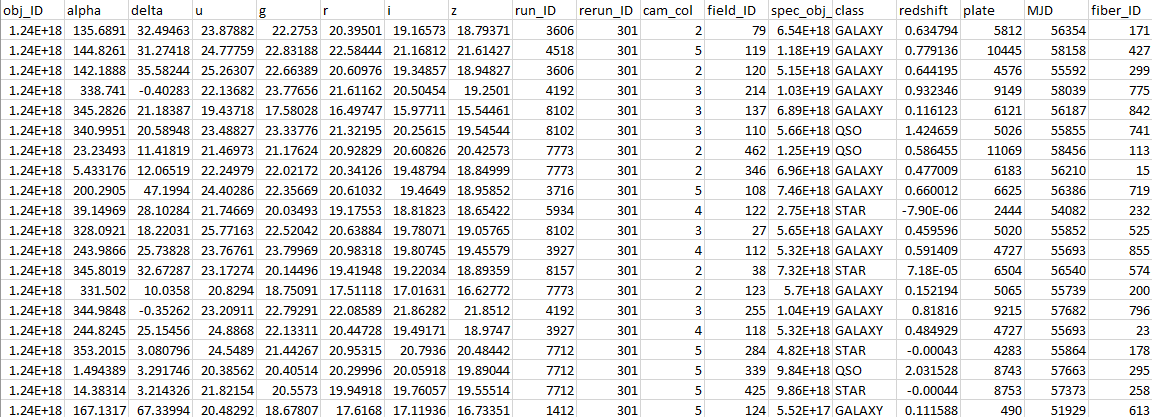

In [1]:
import matplotlib.pyplot as plt
import csv
import math
import numpy as np

def readdata(file, strat = 'int'):
    """
    Used to read .txt file 
    
    Args:
    file (string): 
        file path
    strat (string):
        float int or string type
    """
    file = open(file, "r")
    lines = file.readlines()
    
    #processes line into a value
    
    if strat == 'float':
        for i in range(len(lines)):
            lines[i] = float(lines[i])
        return lines
    elif strat == 'int':
        for i in range(len(lines)):
            lines[i] = int(lines[i])
        return lines
    else:
        return lines
    
def readarray(file):
    file = open(file, "r")
    line_reader = csv.reader(file, delimiter=',')
    results = []
    for row in line_reader:
        temp_list = []
        for i in range(len(row)):
            temp_list.append(float(row[i]))
        
        results.append(temp_list)
    
    return results
    

Traindata is a function which provides N number of randomly selected entries, allowing for smaller lists of data for training and testing of the neural network.

In [2]:
#random data selection

def traindata(list, target, N):
    """
    Grabs random entry's from list and returns new list of those selected entries, and second list containing target values
    
    Args:
    list list:
        variable list
    target list:
        classification list
    N int:
        number of entries to select
    """
    variable_results = []
    class_results = []
    rand_index = np.random.randint(0, 100000, size=N)
    for index in rand_index:
        variable_results.append(list[index])
        class_results.append(target[index])
        
    return variable_results, class_results
    

In [4]:
#data import
star_data = readarray('C:\\Users\\Danny\\Desktop\\Jeremy\\Stellar classification\\star_data.txt')
star_class = readdata('C:\\Users\\Danny\\Desktop\\Jeremy\\Stellar classification\\star_class.txt')


In [5]:
train_var, train_class = traindata(star_data, star_class, 300)

# Scatter Plots
Examining the data through scatter plots from randomly selected entries provides a look at what our Neural Network will look for. 

In [6]:
def list_generator(train_var, x, y):
    column = []
    column_2 = []

    for i in range(len(train_var)):
        column.append(train_var[i][x])
        column_2.append(train_var[i][y])
    return column, column_2

def plotscatter(train_var, train_class):
    label = ['Ultraviolet','Green','Red','Near', 'infrared', 'Redshift']
    fig, axarr = plt.subplots(6, 6)
    fig.set_size_inches(18, 18)
    
    for i in range(6):
        for j in range(6):
            X, Y = list_generator(train_var, i, j)
            if i == j:
                axarr[i,j].text(0.2, 0.5, label[i],fontsize=20)
            else:
                axarr[i,j].scatter(X, Y, c=train_class, cmap=plt.cm.Set1,edgecolor='k')
    plt.show

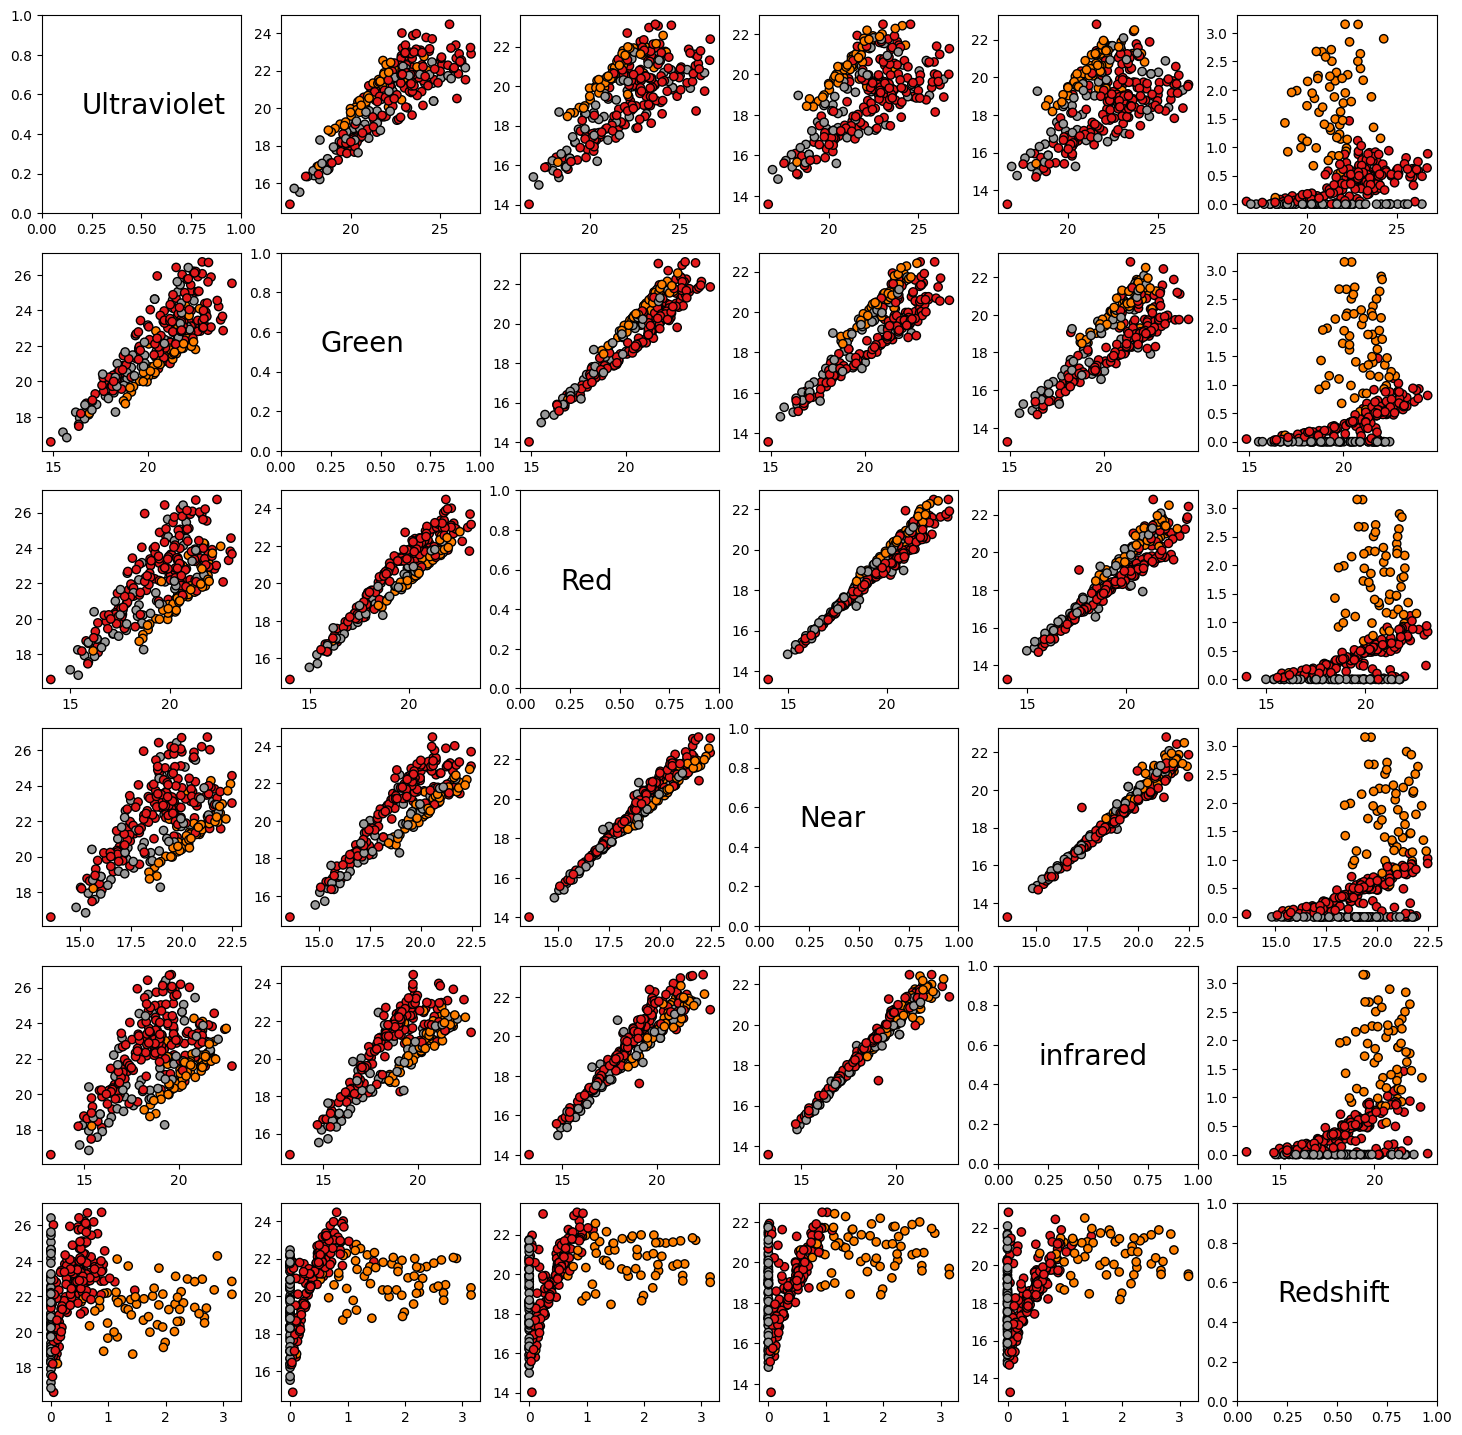

In [7]:
#scatter plots unsure on weither to keep or not
plotscatter(train_var, train_class) 

The scatter plots show that comparing filter values with eachother lacks any clear distinctive qualities. 

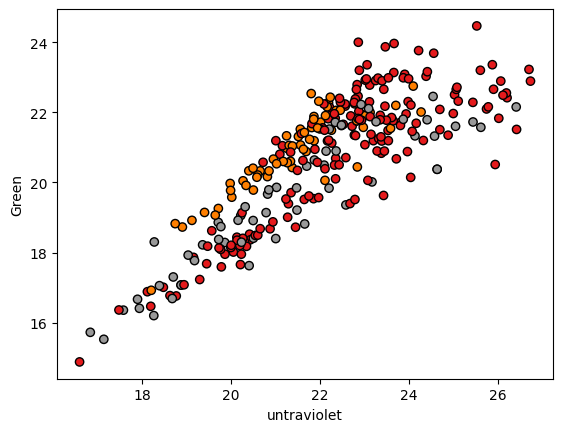

In [8]:
#scatter plots
column = []
column_2 = []

for i in range(len(train_var)):
    column.append(train_var[i][0])
    column_2.append(train_var[i][1])

plt.scatter(column, column_2, c=train_class, cmap=plt.cm.Set1, edgecolor='k')
plt.ylabel('Green')
plt.xlabel('untraviolet')

plt.show()

This leaves comparing filter values to redshift, which create 5 near identical scatter plots. This contains three linear lines, Grey being stars with near 0 or negitive redshift values. Galaxies in red with moderate redshift vaules due to expantion of the Universe, and Quasars with large redshift values due to their high spin velocities. 

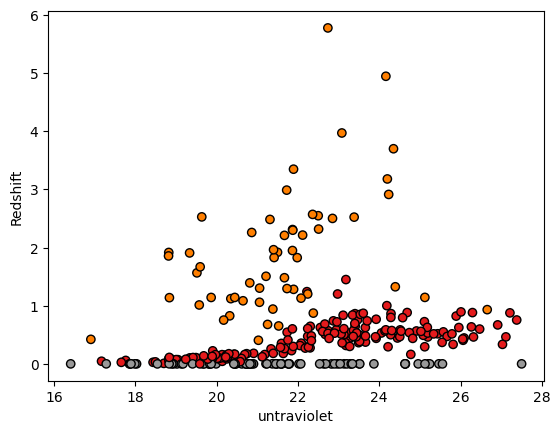

In [ ]:
#scatter plots
column = []
column_2 = []

for i in range(len(train_var)):
    column.append(train_var[i][0])
    column_2.append(train_var[i][5])

plt.scatter(column, column_2, c=train_class, cmap=plt.cm.Set1, edgecolor='k')
plt.ylabel('Redshift')
plt.xlabel('untraviolet')

plt.show()

# The Cannon Neural Network

Named after Annie Jump Cannon, who cateloged stars into the modern steller classificaiton system.


Cannon takes two input values, the ulravoilet filter and redshift value. First the galaxy neuron returns a value near 1 or 0, declaring its classification as either galazy or quasar. Second is the Quasar neuron which returns near 1 or 0 again, this time declaring between quasar and star. These are lastly processed into the output neuron, which declares the final output.

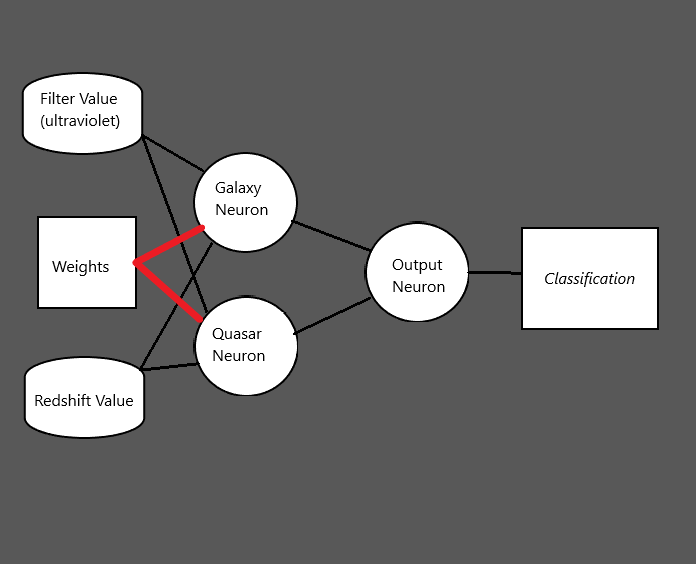

# Coding The Network

In [ ]:
#write single neuron training program from lecture to classify galaxies and quasars/stars
def sigmoid(v):
    return 1./(1+np.exp(-v))

def galaxy_neuron(x, t, max_iter):
    """
    training algorithm for galaxy/quasar binary classifier
    """
    w0 = np.array([1,1,1])
    w_hist = np.zeros([max_iter,3])
    learning_rate = 0.01
    decay = 0.0
    
    for i in range(max_iter):
        a = np.dot(x, w0)
        y = sigmoid(a)
        g = -np.dot(np.transpose(x), t-y)
        w0 = w0 - learning_rate*(g+ decay*w0)
        w_hist[i,:] = w0
    return w_hist

def usableX(training_data):
    temp_list = []
    for i in range(len(training_data)):
        temp_row = [1, training_data[i][0], training_data[i][1]]
        temp_list.append(temp_row)
        
    return np.array(temp_list)

def usable_galaxy(training_class):
    temp_list = []
    for i in training_class:
        if i == 0:
            temp_list.append(1)
        else:
            temp_list.append(0)
    
    return np.array(temp_list)

def usable_quasar(training_class):
    temp_list = []
    for i in training_class:
        if i == 2:
            temp_list.append(1)
        else:
            temp_list.append(0)
    return np.array(temp_list)

def results(x, w0):
    for x0 in x:
        print(sigmoid(w0[0] + w0[1]*x0[1]+w0[2]*x0[2]))
        
def neuron_3(x, w0):
    return sigmoid(w0[0] + w0[1]*x[1]+w0[2]*x[2])

def classifer_neuron(x, weights):
    """
    3 neuron neural network for stellar classification of 3 types of objects
    x is data of [1, x1 , x2]
    weights are array of[w0, w1, w2]
    """
    #takes two neuron outputs, sums, round to whole int
    neuron_result = round(neuron_3(x, weights[0]) + neuron_3(x, weights[1]))
    if neuron_result == 1:
        return 0
    elif neuron_result == 0:
        return 1
    else:
        return 2

def accuracy(test_data, test_class, weights):
    a = 0
    result_list = []
    for i in range(len(test_data)):
        result = classifer_neuron(test_data[i], weights)
        result_list.append(result)
        if result == test_class[i]:
            a += 1
    return a/(len(test_data))

Going through the training function generates linear equations

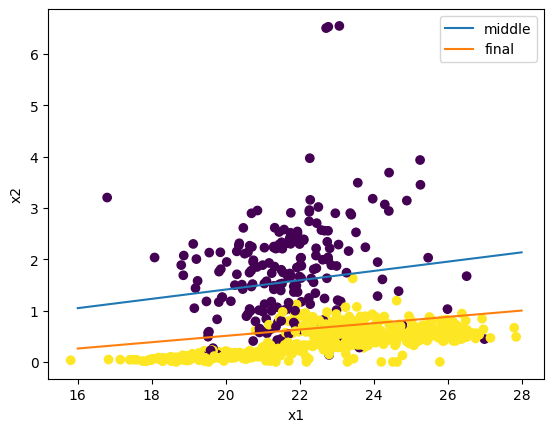

In [ ]:
#galaxy and quasar classificaiton, Purple = quasar, Yellow = Galaxy


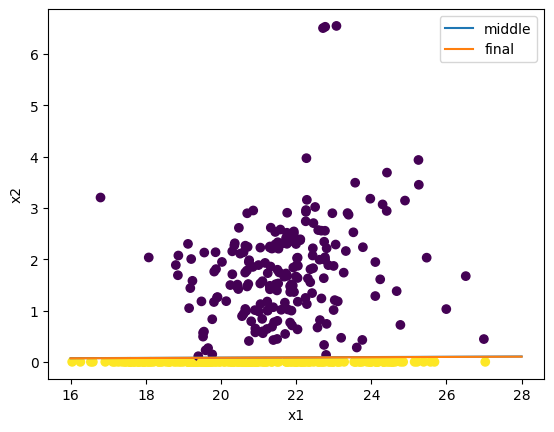

In [127]:
#quasar and star classificaiton, Purple = quasar, Yellow = Stars

plt.show()

# Accuracy 
The overall accuracy for Cannon ranges from 80% - 85%

In [19]:
weights = np.array([[-171.5860479, 19.04230826, -426.67639542], [8.61983593, 0.82466164, -313.70174726]])
temp_data, test_class = training_set(star_data, star_class, 3000)
test_data = usableX(temp_data)

print('Cannon Accuracy', accuracy(test_data, test_class, weights))

Cannon Accuracy 0.8203333333333334


C:\Users\Danny\AppData\Local\Temp\ipykernel_52256\3726141053.py:3: RuntimeWarning: overflow encountered in exp
  return 1./(1+np.exp(-v))


My attempt at using scikit-learn to classifiy Steller data returned a 59%-62% accuracy

In [153]:
test_var, test_class = training_set(data, data_class, 1000)

print('Scikit Accuracy:', accuracy(test_var, test_class))

Scikit Accuracy: 0.613
